In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install konlpy
!apt-get -qq -y install fonts-nanum > /dev/null
!rm -rf ~/.cache/matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 20.5 MB/s eta 0:00:00


/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

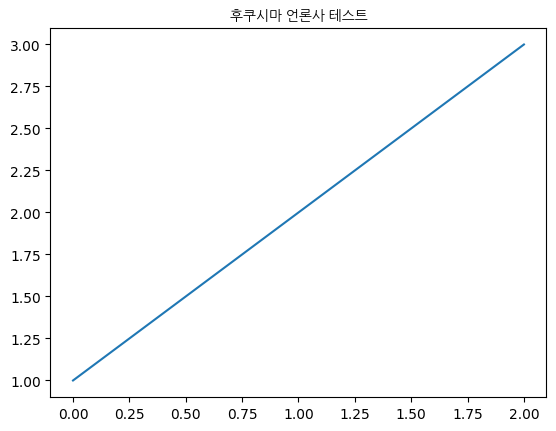

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 경로 확인
!fc-list :lang=ko | grep Nanum

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 테스트
plt.figure()
plt.title("후쿠시마 언론사 테스트", fontproperties=fontprop)
plt.plot([1,2,3])
plt.show()

### 전처리

In [ ]:
import pandas as pd
import ast
import glob

# 1. 경로 설정
path = "/content/drive/MyDrive/후쿠시마/입장결과"  # 네 경로
files = glob.glob(f"{path}/*.xlsx")  # 폴더 안의 모든 xlsx 파일

all_categories = set()  # 전체 감정 카테고리 저장

for file in files:
    df = pd.read_excel(file)

    if '감성점수' not in df.columns:
        print(f"⚠️ {file}에 '감성점수' 열 없음")
        continue

    # 문자열 -> 리스트 변환
    df['감정리스트'] = df['감성점수'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

    # 리스트 -> dict 변환
    df['감정dict'] = df['감정리스트'].apply(lambda x: dict(x))

    # 전체 감정 카테고리 갱신
    for d in df['감정dict']:
        all_categories.update(d.keys())

print("전체 감정 카테고리:", sorted(all_categories))
print("총 카테고리 수:", len(all_categories))

전체 감정 카테고리: ['걱정스러운(불안한)', '고마운', '기쁨(행복한)', '사랑하는', '생각이 많은', '설레는(기대하는)', '슬픔(우울한)', '일상적인', '즐거운(신나는)', '짜증남', '힘듦(지침)']
총 카테고리 수: 11


In [ ]:
import pandas as pd
import glob

path = "/content/drive/MyDrive/후쿠시마/입장결과"
files = glob.glob(f"{path}/*.xlsx")

stance_counts = {}

main_labels = ['찬성', '중립', '반대']  # 주요 라벨

for file in files:
    media_name = file.split('/')[-1].replace('.xlsx','')
    df = pd.read_excel(file)

    if '입장결과' not in df.columns:
        print(f"⚠️ {media_name}: '입장결과' 열 없음, 건너뜀")
        continue

    counts = df['입장결과'].value_counts()

    # 주요 라벨과 기타 분리
    counts_dict = {label: 0 for label in main_labels + ['기타']}
    for label, cnt in counts.items():
        if label in main_labels:
            counts_dict[label] += cnt
        else:
            counts_dict['기타'] += cnt

    stance_counts[media_name] = counts_dict

# DataFrame으로 변환
stance_df = pd.DataFrame(stance_counts).T.fillna(0).astype(int)
stance_df = stance_df[main_labels + ['기타']]  # 열 순서 정리

print("언론사별 입장 결과 집계 (기타 포함)")
print(stance_df)

언론사별 입장 결과 집계 (기타 포함)
                        찬성   중립   반대  기타
내일신문_스탠스    266   52   34   8
문화일보_스탠스     823  121   79  31
국민일보_스탠스   1168  163  126  35
동아일보_스탠스     842  115   83  12
아시아투데이_스탠스   926  232  134  43
한국일보_스탠스    887  143  107  28
경향신문_스탠스  1742  246  247  31
중앙일보_스탠스   1726  203  163  49
조선일보_스탠스    1149  150  112  28
한겨레_스탠스       1101  206  156  32
세계일보_스탠스     2455  336  280  58
서울신문_스탠스   1412  279  150  54


정부의 에너지 전환 정책에 대해 중립적인 입장을 취하고 있습니다. -> 중립
긍정적인 입장 -> 찬성
찬 -> 찬성
중 -> 중립
후쿠시마산 수산물에 국내 수입 금지. -> 반대
기사의 비판적 톤과 이재명 대표에 대한 부정적 평가를 반영하여 반대 입장을 취합니다. 기사가 이재명 -> 반대
중국은 후쿠시마 오염수 방류에 반대하며 일본산 수산물에 대한 수입 규제를 강화 -> 반대
찬성의 입장 -> 찬성
홍콩과 중국은 오염수 방류에 대한 일본 정부의 대응에 대해 비판하며, 식품 안전과 국제적 공의에 -> 반대
[찬성 -> 찬성
기사의 내용은 일본 정부가 대지진에 대한 교훈을 제대로 활용하지 못하고 있다는 것을 비판하고 있지만, 이는 일본의 일반적인 사회적 특성을 반영하는 것으로 보입니다. 따라서, 기사의 입장도 중립적이라고 판단할 수 있습니다. -> 중립
중립 / 50자 이내 요약: 중국은 일본 오염수 방류에 대해 지속적으로 비난하며 예방조치 및 식품 안전 강조. -> 중립
 일본 정부의 오염수 방류 결정에 대해 중립적인 입장. -> 중립
 일본 오염수 방류 반대 -> 반대
 [반대] -> 반대
 찬성 요약: 미국 부통령의 한국 정치에의 영향력 확대 주장 -> 찬성
 찬성 요약: 한국자유총연맹, 정치적 중립 조항 삭제하고 활동 확대.assistant -> 찬성
 지지 -> 찬성
 찬성 / 요약: 정부는 후쿠시마 오염수 문제에 대해 국제기준에 부합하는 안전성을 강조하며 대응하고 있음.assistant -> 찬성
 반대를 -> 반대
 [중립] -> 중립
 회의 -> 반대
 비판 -> 반대
 비판적 -> 반대
 일본 오염수 방류에 반대 -> 반대
 찬성 / 반대 / 중립 중에서 선택: 중립 -> 중립
이것은 반대입니다. -> 반대
 적성 분석: 이 기사는 인공지능 개발과 관련된 국가의 통제에 대해 논하고 있습니다. 주요 주제는 인공지능 기술의 발전이 인간의 권리를 침해할 수 있는 가능성과 이를 방지하기 위한 국가의 역할입니다. 감정 상태: 기사의 전반적인 톤은 중립적이며, 인공지능 개발과 관련된 통제의 필요성에 대한 이해를 바탕으로 한 논리적 주장을 제시하고 있습니다. 이 기사는 인공지능의 발전이 가져올 수 있는 잠재적인 문제점들을 인식하고, 이를 해결하기 위한 국가의 역할을 강조하고 있습니다. 따라서, 이 기사는 독자들에게 인공지능 개발에 있어 국가의 통제가 필요하다는 메시지를 전달하고 있습니다. 결론: 결론적으로, 이 기사는 인공지능 기술의 발전이 인간의 권리를 침해할 수 있는 가능성을 인식하고, 이를 방지하기 위해 국가의 적극적인 역할을 강조합니다. 따라서, 인공지능 개발에 있어 국가의 통제와 윤리적 기준 마련이 필수적임을 시사하고 있습니다. 이 기사는 인공지능 기술의 발전과 관련된 중요한 논의를 제시하고 -> 중립
 회의적 -> 반대

In [ ]:
import pandas as pd
import re
import glob
import os

# 1. 경로 설정
input_path = "/content/drive/MyDrive/후쿠시마/입장결과"
output_path = "/content/drive/MyDrive/후쿠시마/전처리완료"
os.makedirs(output_path, exist_ok=True)

files = glob.glob(f"{input_path}/*.xlsx")

# 2. 라벨 분류 함수
def classify_stance(text):
    if pd.isna(text):
        return None
    t = str(text).strip()

    # 혼합형 (3라벨 모두 언급) → 삭제
    if all(word in t for word in ['찬성','반대','중립']):
        return None

    # 명시적 매핑
    if t in ['찬성', '찬', '지지', '찬성의 입장', '[찬성', '긍정적인 입장']:
        return '찬성'
    if t in ['중립', '중', '[중립']:
        return '중립'
    if t in ['반대', '[반대]', '반대를', '회의', '회의적', '비판', '비판적']:
        return '반대'

    # 문장 패턴 매핑
    if re.search(r'수입 금지|규제 강화|방류.*반대|비판|회의', t):
        return '반대'
    if re.search(r'찬성|지지|긍정적', t):
        return '찬성'
    if re.search(r'중립|중립적', t):
        return '중립'

    return None

# 3. 파일 일괄 처리
for file in files:
    media_name = os.path.basename(file).replace(".xlsx","")
    df = pd.read_excel(file)

    if '입장결과' not in df.columns:
        print(f"⚠️ {media_name}: '입장결과' 열 없음, 건너뜀")
        continue

    df['입장정제'] = df['입장결과'].apply(classify_stance)
    df_cleaned = df.dropna(subset=['입장정제']).copy()

    print(f"✅ {media_name}: {len(df)}건 → {len(df_cleaned)}건으로 축소")

    # 저장
    save_path = os.path.join(output_path, f"{media_name}_cleaned.xlsx")
    df_cleaned.to_excel(save_path, index=False)

print("\n모든 파일 처리 완료! `/전처리완료` 폴더에 저장됨.")

✅ 내일신문_스탠스: 362건 → 353건으로 축소
✅ 문화일보_스탠스: 1060건 → 1039건으로 축소
✅ 국민일보_스탠스: 1500건 → 1472건으로 축소
✅ 동아일보_스탠스: 1062건 → 1045건으로 축소
✅ 아시아투데이_스탠스: 1348건 → 1307건으로 축소
✅ 한국일보_스탠스: 1175건 → 1154건으로 축소
✅ 경향신문_스탠스: 2286건 → 2254건으로 축소
✅ 중앙일보_스탠스: 2163건 → 2118건으로 축소
✅ 조선일보_스탠스: 1449건 → 1422건으로 축소
✅ 한겨레_스탠스: 1502건 → 1474건으로 축소
✅ 세계일보_스탠스: 3153건 → 3091건으로 축소
✅ 서울신문_스탠스: 1923건 → 1859건으로 축소

모든 파일 처리 완료! `/전처리완료` 폴더에 저장됨.


### clustering: 감성점수 벡터화

In [ ]:
import pandas as pd
import ast
import glob
import os
import unicodedata

# 1. 경로 설정
path = "/content/drive/MyDrive/후쿠시마/전처리완료"
files = glob.glob(f"{path}/*.xlsx")

# 감정 카테고리 (11개)
emotion_cats = [
    '걱정스러운(불안한)', '고마운', '기쁨(행복한)', '사랑하는',
    '생각이 많은', '설레는(기대하는)', '슬픔(우울한)',
    '일상적인', '즐거운(신나는)', '짜증남', '힘듦(지침)'
]

media_emotion_vectors = {}

for file in files:
    # 🔹 파일명 안전 처리 (유니코드 정규화 + 확장자 제거)
    filename = unicodedata.normalize('NFC', os.path.basename(file))
    media_name = filename.replace('_스탠스_cleaned.xlsx', '') \
                         .replace('_cleaned.xlsx', '')  # 예외도 처리

    df = pd.read_excel(file)

    if '감성점수' not in df.columns:
        print(f"⚠️ {media_name}: 감성점수 컬럼 없음 → 건너뜀")
        continue

    # 1. 감성점수 문자열/NaN 처리
    def safe_eval(x):
        if pd.isna(x):
            return []
        if isinstance(x, (list, tuple)):
            return x
        if isinstance(x, str):
            try:
                return ast.literal_eval(x)
            except:
                return []
        return []

    df['감정리스트'] = df['감성점수'].apply(safe_eval)

    # 2. list → dict
    df['감정dict'] = df['감정리스트'].apply(lambda x: dict(x))

    # 3. 감정별 컬럼 생성
    for emo in emotion_cats:
        df[emo] = df['감정dict'].apply(lambda x: x.get(emo, 0))

    # 4. 언론사 평균 벡터 계산
    media_emotion_vectors[media_name] = df[emotion_cats].mean().tolist()  # list로 고정

# 5. DataFrame 변환
if media_emotion_vectors:
    media_emotions_df = pd.DataFrame.from_dict(media_emotion_vectors, orient='index', columns=emotion_cats)
    print(media_emotions_df.head())
    print("최종 shape:", media_emotions_df.shape)
else:
    print("❗ media_emotion_vectors가 비어있습니다. 파일/컬럼을 확인하세요.")

        걱정스러운(불안한)       고마운   기쁨(행복한)      사랑하는    생각이 많은  설레는(기대하는)  \
내일신문      0.272329  0.009645  0.028071  0.002336  0.055556   0.187146   
문화일보      0.247181  0.004225  0.025716  0.001738  0.035439   0.138165   
국민일보      0.283801  0.014812  0.071609  0.000704  0.036793   0.152589   
동아일보      0.320414  0.015896  0.041261  0.004164  0.047843   0.163507   
아시아투데이    0.190551  0.011200  0.016691  0.001640  0.015008   0.212567   

         슬픔(우울한)      일상적인  즐거운(신나는)       짜증남    힘듦(지침)  
내일신문    0.312039  0.645192  0.013820  0.290515  0.000000  
문화일보    0.326562  0.702913  0.006385  0.282665  0.000536  
국민일보    0.344930  0.699000  0.022060  0.291994  0.000826  
동아일보    0.382643  0.707841  0.016931  0.318774  0.002209  
아시아투데이  0.211801  0.716669  0.007044  0.209857  0.000438  
최종 shape: (12, 11)


### 스탠스 벡터화 + 기사수

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import unicodedata

# 1. 경로 설정 (_cleaned 파일만 불러오기)
path = "/content/drive/MyDrive/후쿠시마/전처리완료"
files = glob.glob(f"{path}/*.xlsx")

main_labels = ['찬성', '중립', '반대']

stance_ratio = {}     # 언론사별 스탠스 비율
article_counts = {}   # 언론사별 기사 수

for file in files:
    # 🔹 파일명 안전 처리
    filename = unicodedata.normalize('NFC', os.path.basename(file))
    media_name = filename.replace('_스탠스_cleaned.xlsx', '') \
                         .replace('_cleaned.xlsx', '')  # 혹시 모를 예외도 처리

    # 데이터 불러오기
    df = pd.read_excel(file)

    # 기사 수 기록
    article_counts[media_name] = len(df)

    # 스탠스 비율 계산
    counts = df['입장결과'].value_counts(normalize=True)
    stance_ratio[media_name] = [counts.get(lbl, 0) for lbl in main_labels]

# 2. DataFrame 생성
stance_ratio_df = pd.DataFrame.from_dict(stance_ratio, orient='index', columns=main_labels)

# 3. 기사 수(log) 추가
stance_ratio_df['기사수'] = pd.Series(article_counts)
stance_ratio_df['log_기사수'] = np.log1p(stance_ratio_df['기사수'])

print("=== 언론사별 스탠스 비율 + 기사 수 ===")
print(stance_ratio_df.round(3))

=== 언론사별 스탠스 비율 + 기사 수 ===
           찬성     중립     반대   기사수  log_기사수
내일신문    0.754  0.147  0.096   353    5.869
문화일보    0.792  0.116  0.076  1039    6.947
국민일보    0.793  0.111  0.086  1472    7.295
동아일보    0.806  0.110  0.079  1045    6.953
아시아투데이  0.708  0.178  0.103  1307    7.176
한국일보    0.769  0.124  0.093  1154    7.052
경향신문    0.773  0.109  0.110  2254    7.721
중앙일보    0.815  0.096  0.077  2118    7.659
조선일보    0.808  0.105  0.079  1422    7.261
한겨레     0.747  0.140  0.106  1474    7.296
서울신문    0.760  0.150  0.081  1859    7.528
세계일보    0.794  0.109  0.091  3091    8.037


### 합치기

In [ ]:
# 1. 언론사명 인덱스 통일 (둘 다 같은 순서인지 확인)
print(media_emotions_df.index)
print(stance_ratio_df.index)

Index(['내일신문', '문화일보', '국민일보', '동아일보', '아시아투데이', '한국일보', '경향신문', '중앙일보',
       '조선일보', '한겨레', '서울신문', '세계일보'],
      dtype='object')
Index(['내일신문', '문화일보', '국민일보', '동아일보', '아시아투데이', '한국일보', '경향신문', '중앙일보',
       '조선일보', '한겨레', '서울신문', '세계일보'],
      dtype='object')


In [ ]:
# media_emotions_df: 언론사 x 11 감정 평균 DataFrame (앞에서 만든 것)
# stance_ratio_df: 방금 만든 스탠스+기사수 DataFrame

# 2. 합치기
final_features = pd.concat([stance_ratio_df, media_emotions_df], axis=1)

print("=== 최종 언론사 성향 벡터 ===")
print(final_features.head())
print("Shape:", final_features.shape)  # (6, 16) 예상

=== 최종 언론사 성향 벡터 ===
              찬성        중립        반대   기사수   log_기사수  걱정스러운(불안한)       고마운  \
내일신문    0.753541  0.147309  0.096317   353  5.869297    0.272329  0.009645   
문화일보    0.792108  0.116458  0.076035  1039  6.946976    0.247181  0.004225   
국민일보    0.793478  0.110734  0.085598  1472  7.295056    0.283801  0.014812   
동아일보    0.805742  0.110048  0.079426  1045  6.952729    0.320414  0.015896   
아시아투데이  0.708493  0.177506  0.102525  1307  7.176255    0.190551  0.011200   

         기쁨(행복한)      사랑하는    생각이 많은  설레는(기대하는)   슬픔(우울한)      일상적인  즐거운(신나는)  \
내일신문    0.028071  0.002336  0.055556   0.187146  0.312039  0.645192  0.013820   
문화일보    0.025716  0.001738  0.035439   0.138165  0.326562  0.702913  0.006385   
국민일보    0.071609  0.000704  0.036793   0.152589  0.344930  0.699000  0.022060   
동아일보    0.041261  0.004164  0.047843   0.163507  0.382643  0.707841  0.016931   
아시아투데이  0.016691  0.001640  0.015008   0.212567  0.211801  0.716669  0.007044   

             짜증남    힘듦(

# 1. 찬성/중립/반대 + 감정 + 기사수

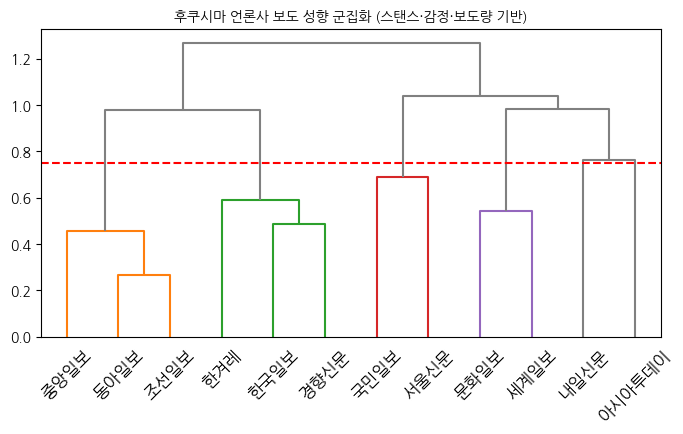


=== 언론사별 클러스터 할당 ===
        cluster
내일신문          5
문화일보          4
국민일보          3
동아일보          1
아시아투데이        5
한국일보          2
경향신문          2
중앙일보          1
조선일보          1
한겨레           2
서울신문          3
세계일보          4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import unicodedata

# 1. 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 2. 표준화 (기사수만 제외, log_기사수는 사용)
features_for_cluster1 = final_features.drop(columns=['기사수'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_cluster1)

# 3. 계층적 클러스터링
link = linkage(X_scaled, method='average', metric='cosine')

# 4. 라벨 정규화
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in features_for_cluster1.index]

# 5. 덴드로그램 시각화
plt.figure(figsize=(8,4))
dendrogram(
    link,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.75,
    above_threshold_color='gray'
)
plt.axhline(y=0.75, color='r', linestyle='--')
plt.title("후쿠시마 언론사 보도 성향 군집화 (스탠스·감정·보도량 기반)", fontproperties=fontprop)
plt.show()

# 6. 클러스터 할당 (예: 5개 그룹)
clusters = fcluster(link, 5, criterion='maxclust')

# ✅ 원본은 보존하고, cluster 정보는 별도 DataFrame에 저장
cluster_df1 = final_features.copy()   # 원본 복사
cluster_df1['cluster'] = clusters     # 새로운 컬럼으로 cluster 정보 저장

print("\n=== 언론사별 클러스터 할당 ===")
print(cluster_df1[['cluster']])

In [ ]:
import pandas as pd

# 1️⃣ 클러스터별 평균 계산 (군집 번호 제외는 numeric_only로 해결)
cluster_summary = cluster_df1.groupby('cluster').mean(numeric_only=True).round(3)

print("\n=== 클러스터별 평균 특징 요약 ===")
print(cluster_summary)

# 2️⃣ 스탠스·감정·기타 시기 변수만 나눠서 볼 수도 있음
stance_cols = ['찬성','중립','반대']
emotion_cols = [col for col in cluster_df1.columns if col in media_emotions_df.columns]
time_cols = [col for col in cluster_df1.columns if '202' in col or '기타' in col]

print("\n=== 클러스터별 평균 스탠스 ===")
print(cluster_summary[stance_cols])

print("\n=== 클러스터별 평균 감정 ===")
print(cluster_summary[emotion_cols])

if time_cols:
    print("\n=== 클러스터별 평균 시기 비율 ===")
    print(cluster_summary[time_cols])


=== 클러스터별 평균 특징 요약 ===
            찬성     중립     반대       기사수  log_기사수  걱정스러운(불안한)    고마운  기쁨(행복한)  \
cluster                                                                       
1        0.810  0.104  0.078  1528.333    7.291       0.309  0.013    0.042   
2        0.763  0.124  0.103  1627.333    7.356       0.348  0.011    0.034   
3        0.777  0.130  0.083  1665.500    7.412       0.287  0.012    0.063   
4        0.793  0.113  0.083  2065.000    7.492       0.255  0.005    0.023   
5        0.731  0.162  0.099   830.000    6.523       0.231  0.010    0.022   

          사랑하는  생각이 많은  설레는(기대하는)  슬픔(우울한)   일상적인  즐거운(신나는)    짜증남  힘듦(지침)  
cluster                                                                     
1        0.003   0.057      0.165    0.383  0.699     0.019  0.323   0.002  
2        0.001   0.063      0.213    0.378  0.687     0.018  0.322   0.003  
3        0.000   0.038      0.137    0.333  0.688     0.017  0.284   0.001  
4        0.001   0.032      0.126    

## ward + 유클리드

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import unicodedata

# 1️⃣ 표준화 (기사수 포함 버전이면 drop 안 함)
features_for_cluster1 = final_features.drop(columns=['기사수'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_cluster)

# 2️⃣ Ward + Euclidean linkage
link_ward = linkage(X_scaled, method='ward', metric='euclidean')

# 3️⃣ 라벨 정규화
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in features_for_cluster.index]

# 4️⃣ 덴드로그램
plt.figure(figsize=(10, 4))
dendrogram(link_ward, labels=labels_kr, leaf_rotation=45)
plt.axhline(y=6, color='r', linestyle='--')  # Ward에서는 거리 값 커짐
plt.title("후쿠시마 언론사 보도 성향 군집화 (Ward + Euclidean)", fontsize=13)
plt.show()

# 5️⃣ 클러스터 할당 (예: 5개)
clusters_ward = fcluster(link_ward, 5, criterion='maxclust')
final_features['cluster_ward'] = clusters_ward

print("\n=== 언론사별 Ward 클러스터 할당 ===")
print(final_features[['cluster_ward']])

# 기사수제외

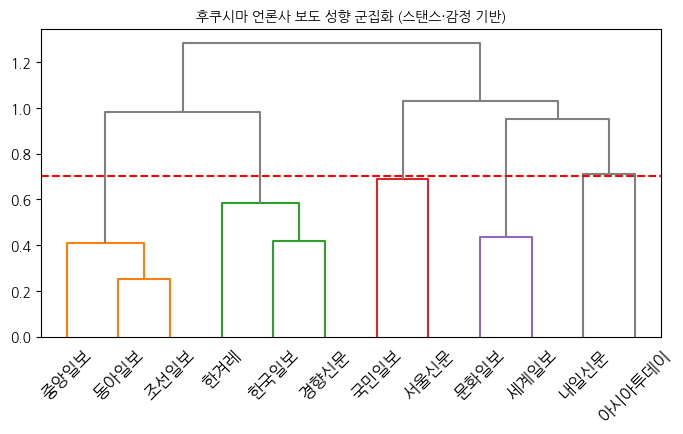


=== 언론사별 클러스터 할당 ===
        cluster
내일신문          5
문화일보          4
국민일보          3
동아일보          1
아시아투데이        5
한국일보          2
경향신문          2
중앙일보          1
조선일보          1
한겨레           2
서울신문          3
세계일보          4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import unicodedata

# 1. 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 2. 표준화 (기사수만 제외, log_기사수는 사용)
features_for_cluster2 = final_features.drop(columns=['기사수','log_기사수'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_cluster2)

# 3. 계층적 클러스터링
link = linkage(X_scaled, method='average', metric='cosine')

# 4. 라벨 정규화
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in features_for_cluster2.index]

# 5. 덴드로그램 시각화
plt.figure(figsize=(8,4))
dendrogram(
    link,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.7,
    above_threshold_color='gray'
)
plt.axhline(y=0.7, color='r', linestyle='--')
plt.title("후쿠시마 언론사 보도 성향 군집화 (스탠스·감정 기반)", fontproperties=fontprop)
plt.show()

# 6. 클러스터 할당 (예: 5개 그룹)
clusters = fcluster(link, 5, criterion='maxclust')

# ✅ 원본은 보존하고, cluster 정보는 별도 DataFrame에 저장
cluster_df2 = final_features.copy()   # 원본 복사
cluster_df2['cluster'] = clusters     # 새로운 컬럼으로 cluster 정보 저장

print("\n=== 언론사별 클러스터 할당 ===")
print(cluster_df2[['cluster']])

In [ ]:
import pandas as pd

# 1️⃣ 클러스터별 평균 계산 (군집 번호 제외는 numeric_only로 해결)
cluster_summary = cluster_df2.groupby('cluster').mean(numeric_only=True).round(3)

print("\n=== 클러스터별 평균 특징 요약 ===")
print(cluster_summary)

# 2️⃣ 스탠스·감정·기타 시기 변수만 나눠서 볼 수도 있음
stance_cols = ['찬성','중립','반대']
emotion_cols = [col for col in cluster_df2.columns if col in media_emotions_df.columns]
time_cols = [col for col in cluster_df2.columns if '202' in col or '기타' in col]

print("\n=== 클러스터별 평균 스탠스 ===")
print(cluster_summary[stance_cols])

print("\n=== 클러스터별 평균 감정 ===")
print(cluster_summary[emotion_cols])


=== 클러스터별 평균 특징 요약 ===
            찬성     중립     반대       기사수  log_기사수  걱정스러운(불안한)    고마운  기쁨(행복한)  \
cluster                                                                       
1        0.810  0.104  0.078  1528.333    7.291       0.309  0.013    0.042   
2        0.763  0.124  0.103  1627.333    7.356       0.348  0.011    0.034   
3        0.777  0.130  0.083  1665.500    7.412       0.287  0.012    0.063   
4        0.793  0.113  0.083  2065.000    7.492       0.255  0.005    0.023   
5        0.731  0.162  0.099   830.000    6.523       0.231  0.010    0.022   

          사랑하는  생각이 많은  설레는(기대하는)  슬픔(우울한)   일상적인  즐거운(신나는)    짜증남  힘듦(지침)  
cluster                                                                     
1        0.003   0.057      0.165    0.383  0.699     0.019  0.323   0.002  
2        0.001   0.063      0.213    0.378  0.687     0.018  0.322   0.003  
3        0.000   0.038      0.137    0.333  0.688     0.017  0.284   0.001  
4        0.001   0.032      0.126    

### 감정으로만

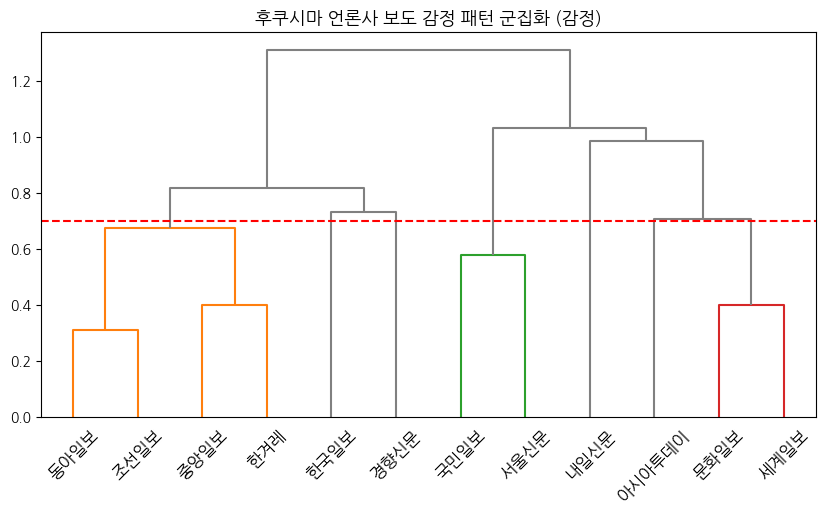


=== 언론사별 감정 기반 클러스터 할당 ===
        cluster_emotion
내일신문                  5
문화일보                  4
국민일보                  3
동아일보                  1
아시아투데이                4
한국일보                  2
경향신문                  2
중앙일보                  1
조선일보                  1
한겨레                   1
서울신문                  3
세계일보                  4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import unicodedata

# 1️⃣ 감정 벡터 DataFrame 준비
X = media_emotions_df.copy()

# 2️⃣ 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ 계층적 클러스터링 (감정 기반)
link_emotion = linkage(X_scaled, method='average', metric='cosine')

# 4️⃣ 라벨 정규화 (한글 깨짐 방지)
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in X.index]

# 5️⃣ 덴드로그램 시각화
plt.figure(figsize=(10,5))
dendrogram(
    link_emotion,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.7,
    above_threshold_color='gray'
)
plt.axhline(y=0.7, color='r', linestyle='--')  # 컷라인 설정
plt.title("후쿠시마 언론사 보도 감정 패턴 군집화 (감정)", fontsize=13)
plt.show()

# 6️⃣ 클러스터 할당 (예: 5개)
clusters_emotion = fcluster(link_emotion, 5, criterion='maxclust')
media_emotions_df['cluster_emotion'] = clusters_emotion

print("\n=== 언론사별 감정 기반 클러스터 할당 ===")
print(media_emotions_df[['cluster_emotion']])

# new : 시간대 반응 패턴

In [ ]:
import pandas as pd
import glob

path = "/content/drive/MyDrive/후쿠시마/전처리완료"
files = glob.glob(f"{path}/*.xlsx")

# 새로운 세분화 라벨링 함수
def event_period_fine(date):
    if pd.Timestamp('2019-08-01') <= date <= pd.Timestamp('2019-08-31'):
        return '2019-08'
    elif pd.Timestamp('2021-04-01') <= date <= pd.Timestamp('2021-04-30'):
        return '2021-04'
    elif pd.Timestamp('2023-05-01') <= date <= pd.Timestamp('2023-07-31'):
        return '2023-05~07'
    elif pd.Timestamp('2023-08-01') <= date <= pd.Timestamp('2023-09-30'):
        return '2023-08~09'
    else:
        return '기타'

time_ratio_list = []

for file in files:
    media_name = file.split('/')[-1].replace('_스탠스_cleaned.xlsx','')
    df = pd.read_excel(file)

    # 날짜 처리
    df['일자'] = pd.to_datetime(df['일자'].astype(str), errors='coerce')
    df = df.dropna(subset=['일자'])
    df['시기'] = df['일자'].apply(event_period_fine)

    # 시기별 기사 비율 계산
    count_series = df['시기'].value_counts()
    ratio_series = count_series / count_series.sum()

    # DataFrame으로 변환
    temp_df = pd.DataFrame(ratio_series).T
    temp_df.index = [media_name]
    time_ratio_list.append(temp_df)

# 언론사별 시기별 기사 비율 DataFrame
time_ratio_fine_df = pd.concat(time_ratio_list).fillna(0)

# 컬럼 순서 정리
time_ratio_fine_df = time_ratio_fine_df[['2019-08','2021-04','2023-05~07','2023-08~09','기타']]

print("\n=== 언론사별 세분화된 시기별 기사 비율 ===")
print(time_ratio_fine_df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-4162630763.py", line 24, in <cell line: 0>
    df = pd.read_excel(file)
         ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 508, in read_excel
    data = io.parse(
           ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1616, in parse
    return self._reader.parse(
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 778, in parse
    data = self.get_sheet_data(sheet, file_rows_needed)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_openpyxl.py", line 615, in get_sheet_data
    for row_number, row in enumerate(sheet.rows):
  File "/usr/loc

In [ ]:
import unicodedata

# final_features와 time_ratio_df 모두 인덱스 정규화
final_features.index = [unicodedata.normalize('NFC', idx) for idx in final_features.index]
time_ratio_fine_df.index = [unicodedata.normalize('NFC', idx) for idx in time_ratio_fine_df.index]

# 정규화 후 일치 여부 확인
print(final_features.index.equals(time_ratio_fine_df.index))

True


In [ ]:
new_final_features = pd.concat([final_features,time_ratio_fine_df], axis=1)
new_final_features.drop(columns=['기사수','log_기사수'],inplace=True)

In [ ]:
new_final_features.head()

,찬성,중립,반대,걱정스러운(불안한),고마운,기쁨(행복한),사랑하는,생각이 많은,설레는(기대하는),슬픔(우울한),일상적인,즐거운(신나는),짜증남,힘듦(지침),2019-08,2021-04,2023-05~07,2023-08~09,기타
내일신문,0.753541,0.147309,0.096317,0.272329,0.009645,0.028071,0.002336,0.055556,0.187146,0.312039,0.645192,0.013820,0.290515,0.000000,0.022663,0.028329,0.308782,0.169972,0.470255
문화일보,0.792108,0.116458,0.076035,0.247181,0.004225,0.025716,0.001738,0.035439,0.138165,0.326562,0.702913,0.006385,0.282665,0.000536,0.010587,0.025024,0.312801,0.179018,0.472570
국민일보,0.793478,0.110734,0.085598,0.283801,0.014812,0.071609,0.000704,0.036793,0.152589,0.344930,0.699000,0.022060,0.291994,0.000826,0.040082,0.061141,0.273098,0.171875,0.453804
동아일보,0.805742,0.110048,0.079426,0.320414,0.015896,0.041261,0.004164,0.047843,0.163507,0.382643,0.707841,0.016931,0.318774,0.002209,0.018182,0.047847,0.303349,0.153110,0.477512
아시아투데이,0.708493,0.177506,0.102525,0.190551,0.011200,0.016691,0.001640,0.015008,0.212567,0.211801,0.716669,0.007044,0.209857,0.000438,0.008416,0.069625,0.315226,0.238715,0.368018


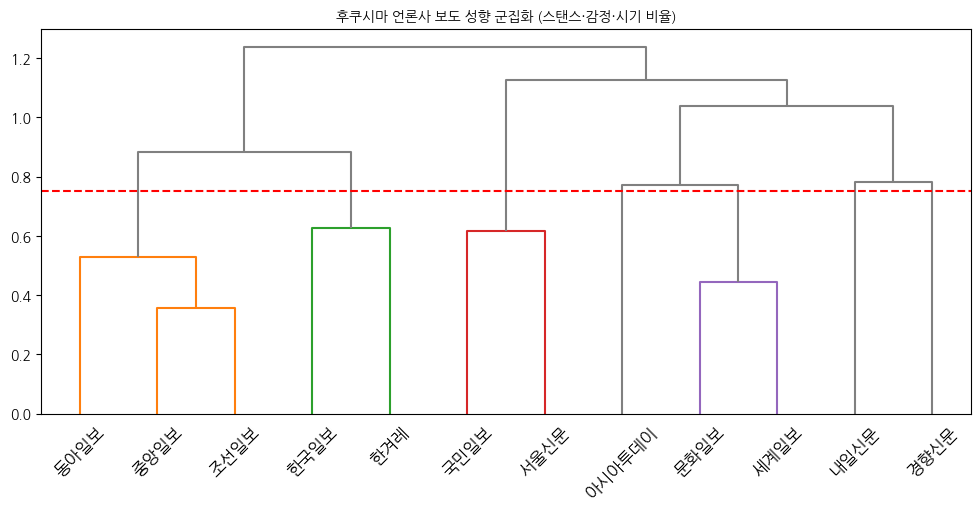


=== 언론사별 최종 클러스터 할당 ===
        cluster_final
내일신문                5
문화일보                4
국민일보                3
동아일보                1
아시아투데이              4
한국일보                2
경향신문                5
중앙일보                1
조선일보                1
한겨레                 2
서울신문                3
세계일보                4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import unicodedata

# 0️⃣ Colab 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 1️⃣ new_final_features 준비
# cluster 같은 이전 군집 결과 컬럼이 있다면 제거
use_features = new_final_features.copy()
use_features = use_features.loc[:, ~use_features.columns.str.contains('cluster')]

# 2️⃣ 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(use_features)

# 3️⃣ 계층적 클러스터링 (코사인 거리 + average linkage)
link = linkage(X_scaled, method='average', metric='cosine')

# 4️⃣ 라벨 정규화
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in use_features.index]

# 5️⃣ 덴드로그램 시각화 (클러스터별 색상)
plt.figure(figsize=(12,5))
dendrogram(
    link,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.75,
    above_threshold_color='gray'
)
plt.axhline(y=0.75, color='r', linestyle='--')
plt.title("후쿠시마 언론사 보도 성향 군집화 (스탠스·감정·시기 비율)", fontproperties=fontprop)
plt.show()

# 6️⃣ 클러스터 번호 할당 (예: 5개)
clusters = fcluster(link, 5, criterion='maxclust')
new_final_features['cluster_final'] = clusters

print("\n=== 언론사별 최종 클러스터 할당 ===")
print(new_final_features[['cluster_final']])

In [ ]:
import pandas as pd

# 1️⃣ 군집 번호를 포함한 최종 데이터 준비
df_cluster = new_final_features.copy()

# 2️⃣ 클러스터 번호 컬럼명 확인
cluster_col = 'cluster_final'

# 3️⃣ 클러스터별 평균 계산 (군집번호 제외한 변수들)
cluster_summary = df_cluster.groupby(cluster_col).mean().round(3)

print("\n=== 클러스터별 평균 특징 요약 ===")
print(cluster_summary)

# 4️⃣ (선택) 스탠스/감정/시기 변수 구간 나눠서 보기
stance_cols = ['찬성','중립','반대']
emotion_cols = media_emotions_df.columns.tolist()
time_cols = time_ratio_df.columns.tolist()

print("\n=== 클러스터별 평균 스탠스 ===")
print(cluster_summary[stance_cols])

print("\n=== 클러스터별 평균 감정 ===")
print(cluster_summary[emotion_cols])

print("\n=== 클러스터별 평균 시기 비율 ===")
print(cluster_summary[time_cols])


=== 클러스터별 평균 특징 요약 ===
                  찬성     중립     반대  걱정스러운(불안한)    고마운  기쁨(행복한)   사랑하는  생각이 많은  \
cluster_final                                                                   
1              0.810  0.104  0.078       0.309  0.013    0.042  0.003   0.057   
2              0.758  0.132  0.099       0.353  0.011    0.037  0.001   0.065   
3              0.777  0.130  0.083       0.287  0.012    0.063  0.000   0.038   
4              0.765  0.134  0.090       0.233  0.007    0.021  0.001   0.026   
5              0.763  0.128  0.103       0.305  0.010    0.028  0.002   0.057   

               설레는(기대하는)  슬픔(우울한)   일상적인  즐거운(신나는)    짜증남  힘듦(지침)  2019-08  \
cluster_final                                                                
1                  0.165    0.383  0.699     0.019  0.323   0.002    0.020   
2                  0.201    0.386  0.687     0.018  0.315   0.003    0.011   
3                  0.137    0.333  0.688     0.017  0.284   0.001    0.033   
4                 

NameError: name 'time_ratio_df' is not defined

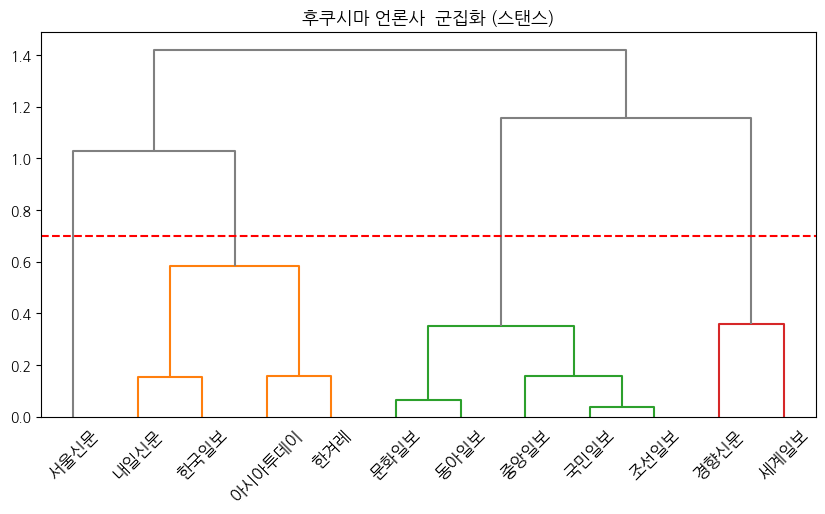


=== 언론사별 감정 기반 클러스터 할당 ===
        cluster_emotion
내일신문                  1
문화일보                  4
국민일보                  4
동아일보                  4
아시아투데이                2
한국일보                  1
경향신문                  5
중앙일보                  4
조선일보                  4
한겨레                   2
서울신문                  3
세계일보                  5


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import unicodedata

# 1️⃣ 감정 벡터 DataFrame 준비
X = stance_ratio_df.copy()

# 2️⃣ 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ 계층적 클러스터링 (감정 기반)
link_emotion = linkage(X_scaled, method='average', metric='cosine')

# 4️⃣ 라벨 정규화 (한글 깨짐 방지)
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in X.index]

# 5️⃣ 덴드로그램 시각화
plt.figure(figsize=(10,5))
dendrogram(
    link_emotion,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.7,
    above_threshold_color='gray'
)
plt.axhline(y=0.7, color='r', linestyle='--')  # 컷라인 설정
plt.title("후쿠시마 언론사  군집화 (스탠스)", fontsize=13)
plt.show()

# 6️⃣ 클러스터 할당 (예: 5개)
clusters_emotion = fcluster(link_emotion, 5, criterion='maxclust')
media_emotions_df['cluster_emotion'] = clusters_emotion

print("\n=== 언론사별 감정 기반 클러스터 할당 ===")
print(media_emotions_df[['cluster_emotion']])

# pca

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 감정 변수 선택
emotion_cols = [
    '걱정스러운(불안한)', '고마운', '기쁨(행복한)', '사랑하는',
    '생각이 많은', '설레는(기대하는)', '슬픔(우울한)',
    '일상적인', '즐거운(신나는)', '짜증남', '힘듦(지침)'
]

emotion_data = final_features[emotion_cols]

# 표준화
scaler = StandardScaler()
emotion_scaled = scaler.fit_transform(emotion_data)

# PCA 2축으로 축소
pca = PCA(n_components=2)
emotion_pca = pca.fit_transform(emotion_scaled)

# 결과 DataFrame으로 변환
emotion_pca_df = pd.DataFrame(
    emotion_pca,
    columns=['Emotion_PC1','Emotion_PC2'],
    index=final_features.index
)

print(emotion_pca_df.head())
print("설명된 분산 비율:", pca.explained_variance_ratio_)

        Emotion_PC1  Emotion_PC2
내일신문      -0.752639    -0.764333
문화일보      -2.750500    -0.535900
국민일보       0.637324    -0.822901
동아일보       1.472833     1.289742
아시아투데이    -4.764225     2.207651
설명된 분산 비율: [0.4370189  0.15311528]


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import unicodedata

# 스탠스 변수 선택
stance_cols = ['찬성','중립','반대']

# 군집화용 데이터: 스탠스 + PCA 감정
features_for_cluster_pca = pd.concat(
    [final_features[stance_cols], emotion_pca_df],
    axis=1
)

# 표준화
X_scaled = scaler.fit_transform(features_for_cluster_pca)

# 계층적 클러스터링 (Cosine + Average)
link = linkage(X_scaled, method='average', metric='cosine')

# 클러스터 할당 (예: 5개 그룹)
clusters_pca = fcluster(link, 4, criterion='maxclust')

# 최종 결과 저장
cluster_result = pd.DataFrame({
    '언론사': features_for_cluster_pca.index,
    'cluster_pca': clusters_pca
}).set_index('언론사')

print("\n=== 언론사별 클러스터 할당 (PCA 감정 요약) ===")
print(cluster_result)


=== 언론사별 클러스터 할당 (PCA 감정 요약) ===
        cluster_pca
언론사                
내일신문              3
문화일보              2
국민일보              2
동아일보              1
아시아투데이            3
한국일보              4
경향신문              4
중앙일보              1
조선일보              1
한겨레               4
서울신문              3
세계일보              2


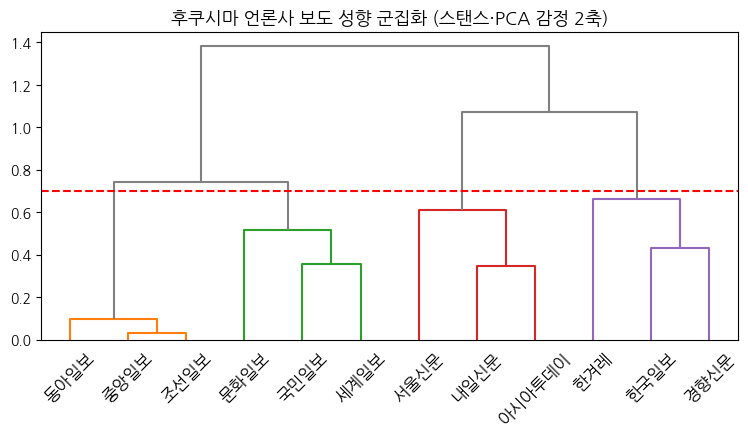

In [ ]:
labels_kr = [unicodedata.normalize('NFC', lbl) for lbl in features_for_cluster_pca.index]

plt.figure(figsize=(9,4))
dendrogram(
    link,
    labels=labels_kr,
    leaf_rotation=45,
    color_threshold=0.7,
    above_threshold_color='gray'
)
plt.axhline(y=0.7, color='r', linestyle='--')
plt.title("후쿠시마 언론사 보도 성향 군집화 (스탠스·PCA 감정 2축)", fontsize=13)
plt.show()

In [ ]:
import pandas as pd

# 1️⃣ 클러스터 결과를 기존 데이터와 합치기
cluster_df_pca = final_features.copy()
cluster_df_pca['cluster_pca'] = clusters_pca   # fcluster 결과

# 2️⃣ 클러스터별 평균 특징 요약
cluster_summary = cluster_df_pca.groupby('cluster_pca').mean()

print("=== 클러스터별 평균 특징 요약 ===")
print(cluster_summary)

# 3️⃣ 클러스터별 평균 스탠스
stance_cols = ['찬성','중립','반대']
print("\n=== 클러스터별 평균 스탠스 ===")
print(cluster_summary[stance_cols])

# 4️⃣ 클러스터별 평균 감정 (PCA 적용 전 원본 감정 변수)
emotion_cols = ['걱정스러운(불안한)','고마운','기쁨(행복한)','사랑하는',
                '생각이 많은','설레는(기대하는)','슬픔(우울한)',
                '일상적인','즐거운(신나는)','짜증남','힘듦(지침)']
print("\n=== 클러스터별 평균 감정 ===")
print(cluster_summary[emotion_cols])

=== 클러스터별 평균 특징 요약 ===
                   찬성        중립        반대          기사수   log_기사수  걱정스러운(불안한)  \
cluster_pca                                                                    
1            0.809559  0.103793  0.078383  1528.333333  7.290650    0.309348   
2            0.793276  0.111965  0.084073  1867.333333  7.426202    0.264347   
3            0.740527  0.158298  0.093177  1173.000000  6.857961    0.250923   
4            0.762809  0.124271  0.102713  1627.333333  7.356391    0.348231   

                  고마운   기쁨(행복한)      사랑하는    생각이 많은  설레는(기대하는)   슬픔(우울한)  \
cluster_pca                                                                
1            0.012708  0.041951  0.003351  0.057008   0.165470  0.383352   
2            0.008361  0.039301  0.001111  0.033568   0.134556  0.326267   
3            0.010341  0.033341  0.001374  0.036304   0.173423  0.281510   
4            0.011089  0.033921  0.000984  0.062891   0.212792  0.377706   

                 일상적인  즐거운(신나는)       짜